In [1]:
################ SOCIAL GROUP OPTIMIZATION ###################

In [2]:
import scipy
from scipy.linalg import eig
from scipy.optimize import differential_evolution
import numpy as np
from scipy.optimize import rosen
from random import random
from random import uniform
from random import randint
from random import choice
import numpy as np

In [3]:
######## SUB-FUNCTIONS ##############

# N: number of people
# bounds: list of tuples of boundaries for each design variables

def initization(N, bounds):   
    D=len(bounds)
    X=[]
    i=0
    while i < N:
        x=[]
        for i in range(D):
                x.append(bounds[i][0] + random()*(bounds[i][1] - bounds[i][0]))
        x.append(min_func(x))
#         print(x)
        X.append(x)
        i=len(X)
    return np.array(X)

def improving_phase(X, c):
    D=X.shape[1]
    min_index=int(np.where(X == min(X[:,-1]))[0])
    best=X[min_index,:-1] 
    for k in range (N):       
        r0=uniform(-1,1)
        candidate_X_k=X[k,:-1]
        for i in range(D-1):
#             r0=uniform(0,1)
            candidate_X_k_i = c*X[k,i] + r0*(best[i] - X[k,i])
            if candidate_X_k_i < bounds[i][0] or candidate_X_k_i > bounds[i][1]:
                candidate_X_k_i = (candidate_X_k_i+bounds[i][0])/2
#                 candidate_X_k_i = bounds[i][0]
                
                candidate_X_k[i]=candidate_X_k_i
        if min_func(candidate_X_k) < X[k,-1]: 
            X[k,:-1]=candidate_X_k
            X[k,-1]=min_func(candidate_X_k)
    return X


def acquiring_phase(X):
    D=X.shape[1]
    min_index=int(np.where(X == min(X[:,-1]))[0])
    best=X[min_index,:-1]

    for k in range (N): 
        r1=uniform(-1,1)
        if k!=min_index:
            range_choice=list(range(0,N))
            range_choice.remove(min_index)                     
            range_choice.remove(k)       
            r=choice(range_choice)    
            if X[k,-1] > X[r,-1]:
                r2=uniform(-1,1)
                candidate_X_k=X[k,:-1] + r1*(X[r,:-1] - X[k,:-1])
                for i in range(D-1):                    
                    candidate_X_k[i] +=  r2*(best[i] - X[k,i])
                    if candidate_X_k[i] < bounds[i][0] or candidate_X_k[i] > bounds[i][1]:
                        candidate_X_k[i] = (candidate_X_k[i]+bounds[i][0])/2
                if min_func(candidate_X_k) < X[k,-1]: 
                    X[k,:-1] = candidate_X_k              
                    X[k,-1] = min_func(candidate_X_k) 
            elif X[k,-1] < X[r,-1]:
                r1=uniform(-1,1)
                r2=uniform(-1,1)
                candidate_X_k = X[k,:-1]
                for i in range(D-1):
                    candidate_X_k[i] += r1*(X[k,i] - X[r,i]) + r2*(best[i] - X[k,i])
                    if candidate_X_k[i] < bounds[i][0] or candidate_X_k[i] > bounds[i][1]:
                        candidate_X_k[i] = (candidate_X_k[i]+bounds[i][0])/2
                if min_func(candidate_X_k) < X[k,-1]: 
                    X[k,:-1] = candidate_X_k              
                    X[k,-1] = min_func(candidate_X_k)
    return X


In [4]:
######## OBJECTIVE FUNCTION MINIMUM ##############
def min_func(a):
    result=rosen(a)
    return result

In [5]:
######## MAIN OPTIMIZATION FUNCTION ##############

def social_group_optimization(min_func, bounds, N, generation, c, data_record=False):
    INI=initization(N, bounds)       
    #### with number of interaction ###
    data=[]
    for ii in range (generation):
        
        IMP=improving_phase(INI, c)
        ACQ=acquiring_phase(IMP)
        INI=ACQ
        
    ###### data recording ##########
        try:
            min_index=int(np.where(INI == min(INI[:,-1]))[0])
            best=INI[min_index]      
            max_index=int(np.where(INI == max(INI[:,-1]))[0])
            worst=INI[max_index]        
            try:
                if ii/100 == round(ii/100):
                    print("Generation number:  ", round(ii,0), "         best: ",
                          round(best[-1],5), "         worst: ", round(worst[-1],5))
            except:
                pass
        except:
            pass
        if data_record:            
            data.append([list(best), list(worst)])
        
        
    return best, data

In [6]:
bounds = [(0, 2), (0, 2), (0, 2), (0, 2), (0, 2)]               
N=50
generation=10000
c=0.7
best,data=social_group_optimization(min_func, bounds, N, generation, c, True) 


Generation number:   0          best:  11.38195          worst:  1074.88796
Generation number:   100          best:  0.86184          worst:  9.29001
Generation number:   200          best:  0.76983          worst:  6.81596
Generation number:   300          best:  0.74992          worst:  2.44971
Generation number:   400          best:  0.73946          worst:  2.44971
Generation number:   500          best:  0.73946          worst:  2.44971
Generation number:   600          best:  0.73946          worst:  1.65062
Generation number:   700          best:  0.73946          worst:  1.65062
Generation number:   800          best:  0.73946          worst:  1.54251
Generation number:   900          best:  0.73946          worst:  1.54251
Generation number:   1000          best:  0.73946          worst:  1.54251
Generation number:   1100          best:  0.73946          worst:  1.54251
Generation number:   1200          best:  0.73946          worst:  1.28504
Generation number:   1300        

In [7]:
print("Best design parameters: ", best[:-1])
print("Best Objective Function: ", best[-1])

Best design parameters:  [0.99967834 0.99975529 0.99940881 0.99463585 0.99243461]
Best Objective Function:  0.002777496490812081


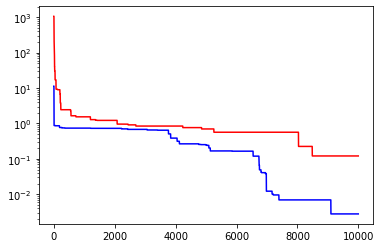

In [11]:
# import matplotlib.pyplot as plt

# data=np.asarray(data)
# data.shape

# x_cord=np.arange(data.shape[0])

# fig = plt.figure()
# plt.plot(x_cord,data[:,1,-1], color="r")
# plt.plot(x_cord,data[:,0,-1], color="b")
# plt.yscale("log")
# # plt.xscale("log")
# plt.show()

In [12]:
########## Validating with DE ############
bounds = [(0, 2), (0, 2), (0, 2), (0, 2), (0, 2)]

result = differential_evolution(min_func, bounds)
print("Best design parameters: ", result.x)
print("Best Objective Function: ", result.fun)

Best design parameters:  [1. 1. 1. 1. 1.]
Best Objective Function:  0.0
